# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA EN ESTA CELDA TU RESPUESTA**

Considerando la consigna del problema creo necesario analizar los siguientes datos:

Características de las propiedades tales como la cantidad de ambientes, dormitorios; baños; amenities(si los tuviera);cochera; dependencias de servicio; etc. 

Tipología de las propiedades, me refiero a si son casas, departamentos; duplex;galpones;locales comerciales;lotes;etc.

Costo del metro cuadrado por zona y de forma concomitante es fundamental conocer datos sobre la superficie de las propiedades, tanto superficie total y superficie construida.

Tipo de zona donde se encuentra emplazada la propiedad, lo que permitirá segmentar según se encuentre en una avenida, barrio cerrado; complejo de edificios de acceso libre; o complejos cerrados de edificios; zonas de residencias(prevalencias de casas);etc.


---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

##### Cargo el dataset usando las funcionalidades de Pandas. 

In [2]:
prop=pd.read_csv('properati.csv')

##### Imprimo cuántas filas y columnas tiene

In [3]:
filas= prop.shape[0]
columnas = prop.shape[1]

In [4]:
print('El dataset tiene ' + str(filas) + ' filas y ' + str(columnas) + ' columnas')

El dataset tiene 146660 filas y 19 columnas


##### Imprimo sus cinco primeras instancias.

In [5]:
prop.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


##### Valores Faltantes: imprimo en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [6]:
df_valores_faltantes=prop.isna().sum().to_frame()
df_valores_faltantes= df_valores_faltantes.reset_index()
df_valores_faltantes.index.name = 'Index'
df_valores_faltantes.columns= ['Nombre Columnas', 'Valores Faltantes']
df_valores_faltantes

,Nombre Columnas,Valores Faltantes
Index,,
0,start_date,0
1,end_date,0
2,created_on,0
3,lat,9925
4,lon,9959
5,l1,0
6,l2,0
7,l3,0
8,rooms,0


3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

##### Imprimo tipos de propiedad publicados en el dataset y sus respectivas instancias

In [7]:
series_prop = prop['property_type'].value_counts()
tipo_prop = series_prop.to_frame()
tipo_prop = tipo_prop.reset_index()
tipo_prop.index.name = 'Index'
tipo_prop.columns    = ['Tipo de Propiedad', 'Instancias']
tipo_prop

,Tipo de Propiedad,Instancias
Index,,
0,Departamento,107326
1,Casa,21521
2,PH,14298
3,Lote,1312
4,Oficina,658
5,Otro,374
6,Local comercial,325
7,Casa de campo,322
8,Depósito,265


##### Grafíco instancias por tipo de propiedad

Text(0.5, 1.0, 'Publicaciones Totales por Tipo de Propiedad')

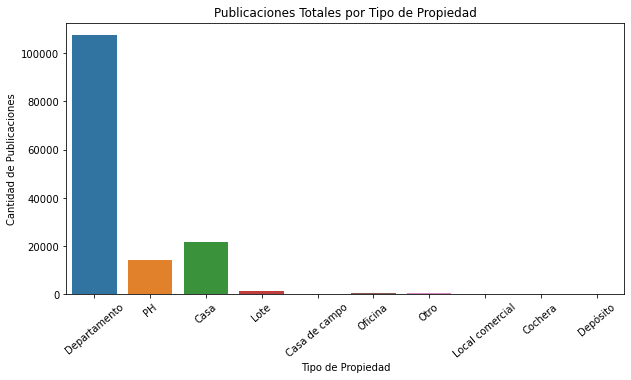

In [8]:
plt.figure(figsize=(10,5)) 
ax = sns.countplot(x='property_type', data=prop)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
sns.countplot(x='property_type', data=prop)
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad de Publicaciones')
plt.title('Publicaciones Totales por Tipo de Propiedad')

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

##### Publicaciones por Regiones 

In [9]:
series_l2=prop.l2.value_counts()
df_l2 = series_l2.to_frame()
df_l2 = df_l2.reset_index()
df_l2.index.name = 'Indice'
df_l2.columns    = ['Regiones', 'Publicaciones']
df_l2

,Regiones,Publicaciones
Indice,,
0,Capital Federal,92539
1,Bs.As. G.B.A. Zona Norte,24282
2,Bs.As. G.B.A. Zona Sur,17173
3,Bs.As. G.B.A. Zona Oeste,12666


##### Publicaciones por Barrios

In [10]:
series_l3=prop.l3.value_counts()
df_l3 = series_l3.to_frame()
df_l3 = df_l3.reset_index()
df_l3.index.name = 'Indice'
df_l3.columns= ['Barrios', 'Publicaciones']
df_l3.head()

,Barrios,Publicaciones
Indice,,
0,Palermo,13073
1,Tigre,8718
2,Almagro,7527
3,Belgrano,6935
4,Caballito,6650


##### Gráficos con Subplot de Matplotlib

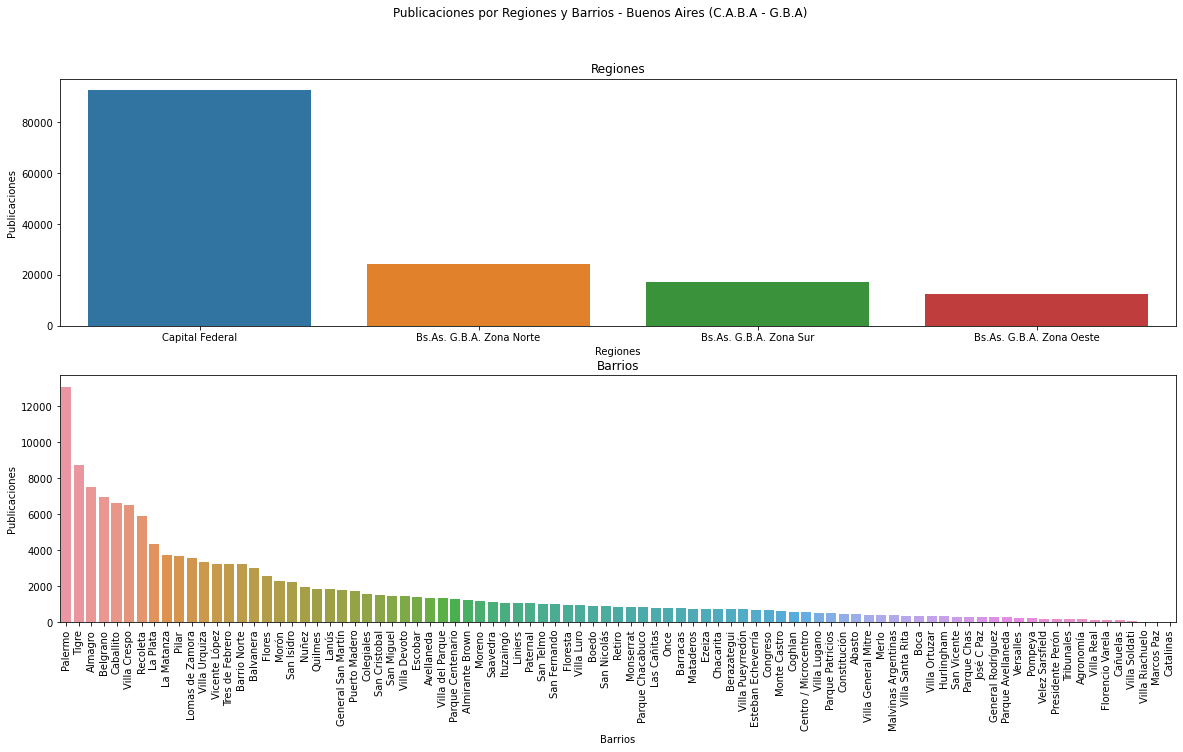

In [11]:
graf, axes =plt.subplots(2,1,sharex=False,sharey=False,figsize=(20,10))
graf.suptitle('Publicaciones por Regiones y Barrios - Buenos Aires (C.A.B.A - G.B.A)')

graf_reg=sns.barplot(ax=axes[0], x=df_l2.Regiones,y=df_l2.Publicaciones)
axes[0].set_title('Regiones')
    
graf_barrios=sns.barplot(ax=axes[1], x=df_l3.Barrios,y=df_l3.Publicaciones)
axes[1].set_title('Barrios')
for item in graf_barrios.get_xticklabels():
    item.set_rotation(90)

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [12]:
df_capital_federal = prop[(prop.l2 == 'Capital Federal') & 
                          (prop.property_type.isin(['Departamento', 'Casa', 'PH']))]
df_capital_federal.shape 

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

Creo un nuevo data frame el cual contendrá colamente las columnas que me sirven para el posterior analisis

In [13]:
filtrado=df_capital_federal.drop(['lat','lon','start_date','end_date', 'created_on',
                                  'l1', 'currency','title','description','operation_type'], axis=1)

#### Obtengo los primeros valores estadísticos

In [14]:
filtrado.describe().astype(int)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485,91485,89314,82568,82250,91485
mean,2,1,1,112,94,259500
std,1,1,0,980,778,322265
min,1,0,1,10,1,6000
25%,2,1,1,49,44,120000
50%,3,2,1,71,63,175000
75%,4,3,2,111,96,279000
max,26,15,14,126062,126062,32434232


##### En una primera interpretación del cuadro generado, identifico outliers importantes en todas las columnas analizadas

##### Obtengo un primer cuadro de correlaciones

In [15]:
filtrado.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.927300,0.603174,0.064774,0.066757,0.448318
bedrooms,0.927300,1.000000,0.603968,0.064468,0.066174,0.413555
bathrooms,0.603174,0.603968,1.000000,0.056524,0.058192,0.587724
surface_total,0.064774,0.064468,0.056524,1.000000,0.770742,0.049071
surface_covered,0.066757,0.066174,0.058192,0.770742,1.000000,0.054534
price,0.448318,0.413555,0.587724,0.049071,0.054534,1.000000


##### Realizo un Heat Map de las Correlaciones de Variables 

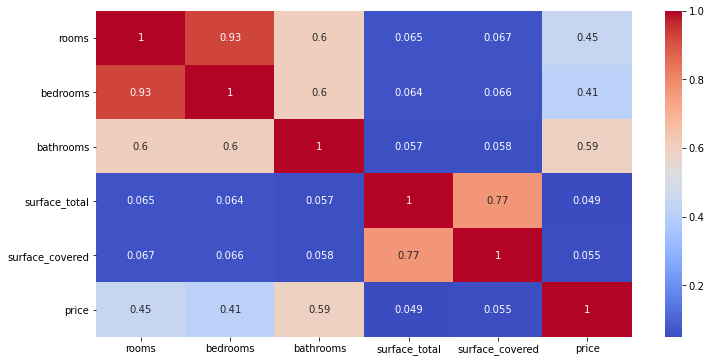

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(filtrado.corr(),cmap='coolwarm',annot=True)

#### Naturalmente las correlaciones están afectadas por los outliers. 
Para filtrar outliers considero necesario verificar si hay valores nulos.
Procedo a verificar.

In [17]:
filtrado.isna().sum()

l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
property_type         0
dtype: int64

##### Importante: Habiendo comprobado la existencia de valores nulos, opto por reemplazarlos por el valor 0 y no eliminarlos. Tomé esta decisión porqué son muchas instancias y el costo de perderlas completamente es elevado. Considerar que el data set resultante tiene datos que en baños, superficie cubierta y superficie total; tienen valores igual a cero.

In [18]:
filtrado.bathrooms =filtrado.bathrooms.fillna(value = 0)
filtrado.surface_total =filtrado.surface_total.fillna(value = 0)
filtrado.surface_covered = filtrado.surface_covered.fillna(value = 0)

##### Verifico el reemplazo de valores nulos por valor cero.

In [19]:
filtrado.isna().sum()

l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

In [20]:
filtrado.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,91485.000000,91485.000000,91485.000000,9.148500e+04
mean,2.964278,1.960278,1.523124,101.648729,85.379887,2.595003e+05
std,1.314704,1.072946,0.882587,932.291809,738.730094,3.222654e+05
min,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,43.000000,40.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,66.000000,58.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,104.000000,90.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Text(0, 0.5, 'surface_total')

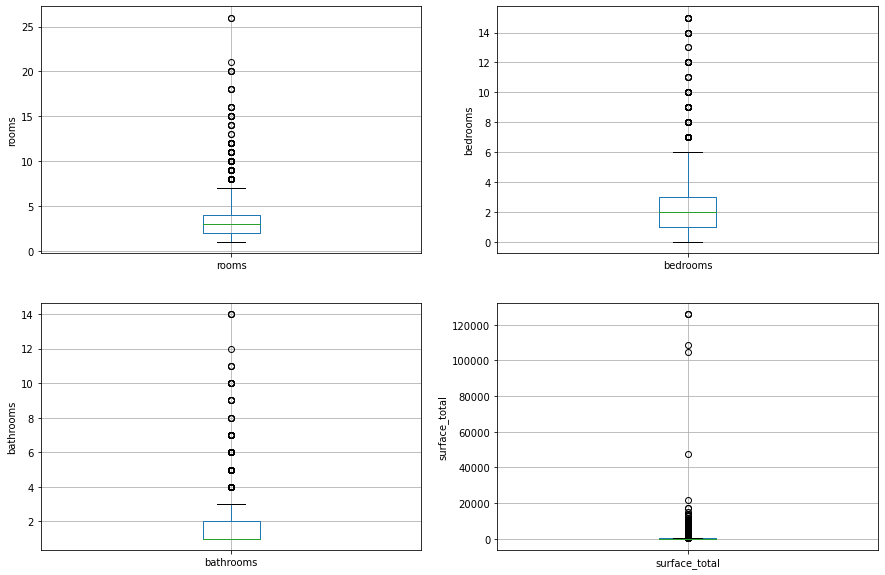

In [20]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = filtrado.boxplot(column='rooms')
fig.set_title('')
fig.set_ylabel('rooms')


plt.subplot(2, 2, 2)
fig = filtrado.boxplot(column='bedrooms')
fig.set_title('')
fig.set_ylabel('bedrooms')


plt.subplot(2, 2, 3)
fig = filtrado.boxplot(column='bathrooms')
fig.set_title('')
fig.set_ylabel('bathrooms')


plt.subplot(2, 2, 4)
fig = filtrado.boxplot(column='surface_total')
fig.set_title('')
fig.set_ylabel('surface_total')


Algunas instancias tienen valores de superficie (surface_total) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.

##### Filtro outliers para las columnas surface_total y price. Genero en cada paso, un nuevo data frame que guarde el filtro realizado; para lograr una aproximación más precisa sobre los valores estadísticos de los datos.

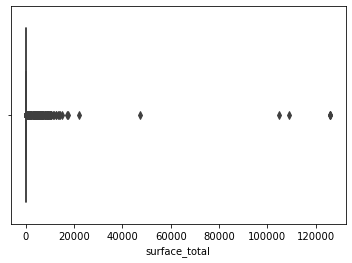

In [21]:
sns.
(x='surface_total',data=filtrado)

In [22]:
filtrado.shape

(91485, 9)

In [23]:
antes_limpieza=filtrado.shape[0]
antes_limpieza

91485

In [24]:
Q1 = np.quantile(filtrado.surface_total, .25)
Q3 = np.quantile(filtrado.surface_total, .75)
IQR = Q3 - Q1
IQMenor = Q1 - (IQR * 1.5)
IQMayor = Q3 + (IQR * 1.5)
surf_fil=filtrado[(filtrado.surface_total> IQMenor) & (filtrado.surface_total< IQMayor)]

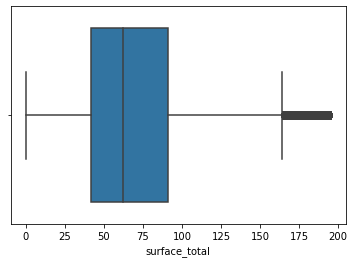

In [25]:
sns.boxplot(x='surface_total', data = surf_fil)

In [26]:
surf_fil.shape

(84499, 9)

In [27]:
despues_limpieza = surf_fil.shape[0]
print('Se descartaron un total de ', antes_limpieza - despues_limpieza)

Se descartaron un total de  6986


In [28]:
surf_fil = surf_fil.reset_index(drop=True)

Filtro outliers de la columna 'price'

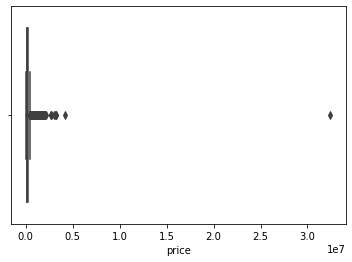

In [29]:
sns.boxplot(x='price', data = surf_fil)

In [30]:
antes_limpieza =surf_fil.shape[0]
antes_limpieza

84499

In [31]:
Q1 = np.quantile(surf_fil.price, .25)
Q3 = np.quantile(surf_fil.price, .75)
IQR = Q3 - Q1
IQMenor = Q1 - (IQR * 1.5)
IQMayor = Q3 + (IQR * 1.5)
price_filt= surf_fil[(surf_fil.price> IQMenor) & (surf_fil.price< IQMayor)]

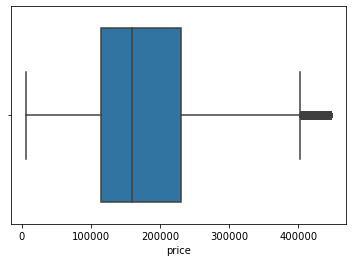

In [32]:
sns.boxplot(x='price', data = price_filt)

In [33]:
price_filt.shape

(79199, 9)

In [34]:
despues_limpieza = price_filt.shape[0]
print('Se descartaron un total de ', antes_limpieza - despues_limpieza)

Se descartaron un total de  5300


In [35]:
price_filt = price_filt.reset_index(drop=True)

In [36]:
outliers_filt = price_filt

##### Filtrados todos los outliers, finalmente obtengo un cuadro de datos estadísticos más precisos y puedo seleccionar con mejor criterio las variables que me servirán para efectuar inferencias en el resto del proyecto.

In [37]:
outliers_filt.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.931545,0.485096,0.629229,0.208966,0.595111
bedrooms,0.931545,1.000000,0.486294,0.622439,0.207593,0.577289
bathrooms,0.485096,0.486294,1.000000,0.439732,0.143159,0.577154
surface_total,0.629229,0.622439,0.439732,1.000000,0.302407,0.597575
surface_covered,0.208966,0.207593,0.143159,0.302407,1.000000,0.189933
price,0.595111,0.577289,0.577154,0.597575,0.189933,1.000000


##### Realizo un nuevo heatmap con los nuevos valores post filtrado de outliers 

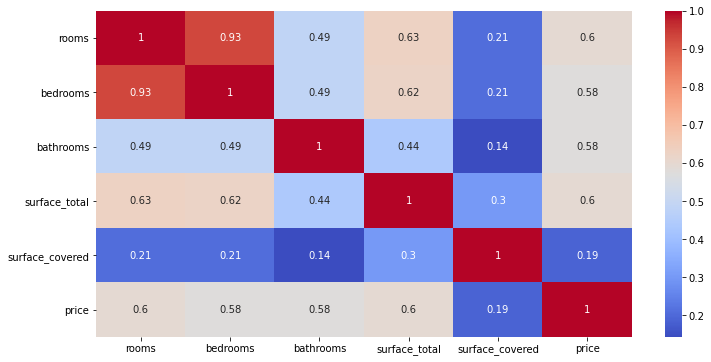

In [38]:
plt.figure(figsize=(12,6))
sns.heatmap(outliers_filt.corr(),cmap='coolwarm',annot=True)

Las propiedades no pueden tener surface_covered mayor a surface_total. Si eso sucede, debes filtrar esas instancias.

##### Verifico el shape de mi data frame antes de filtrar las inctancias con surface_covered mayor a surface_total, para comparar cantidad de instancias posterior al filtrado solicitado.

In [39]:
outliers_filt.shape

(79199, 9)

##### Filtro las instancias con "surface_covered" mayor a "surface_total".Creo una variable surface_valor_invertido, para que almacene las instancias surface_covered mayor a surface_total.

In [40]:
surface_valor_invertido= outliers_filt[outliers_filt['surface_total'] < 
                                       outliers_filt['surface_covered']]

##### Creo un nuevo data frame, con las instancias ya filtradas  de "surface_covered" mayor a "surface_total"  

In [41]:
proper_final=outliers_filt[outliers_filt['surface_total'] >= outliers_filt['surface_covered']]
print('Se eliminaron '+ str(surface_valor_invertido.shape[0] ) + ' instancias')

Se eliminaron 831 instancias


##### Verifico el procedimiento anterior

In [42]:
proper_final.shape

(78368, 9)

##### Habiendo filtrado el dataset, grafico empleando `pairplot` de Seaborn.

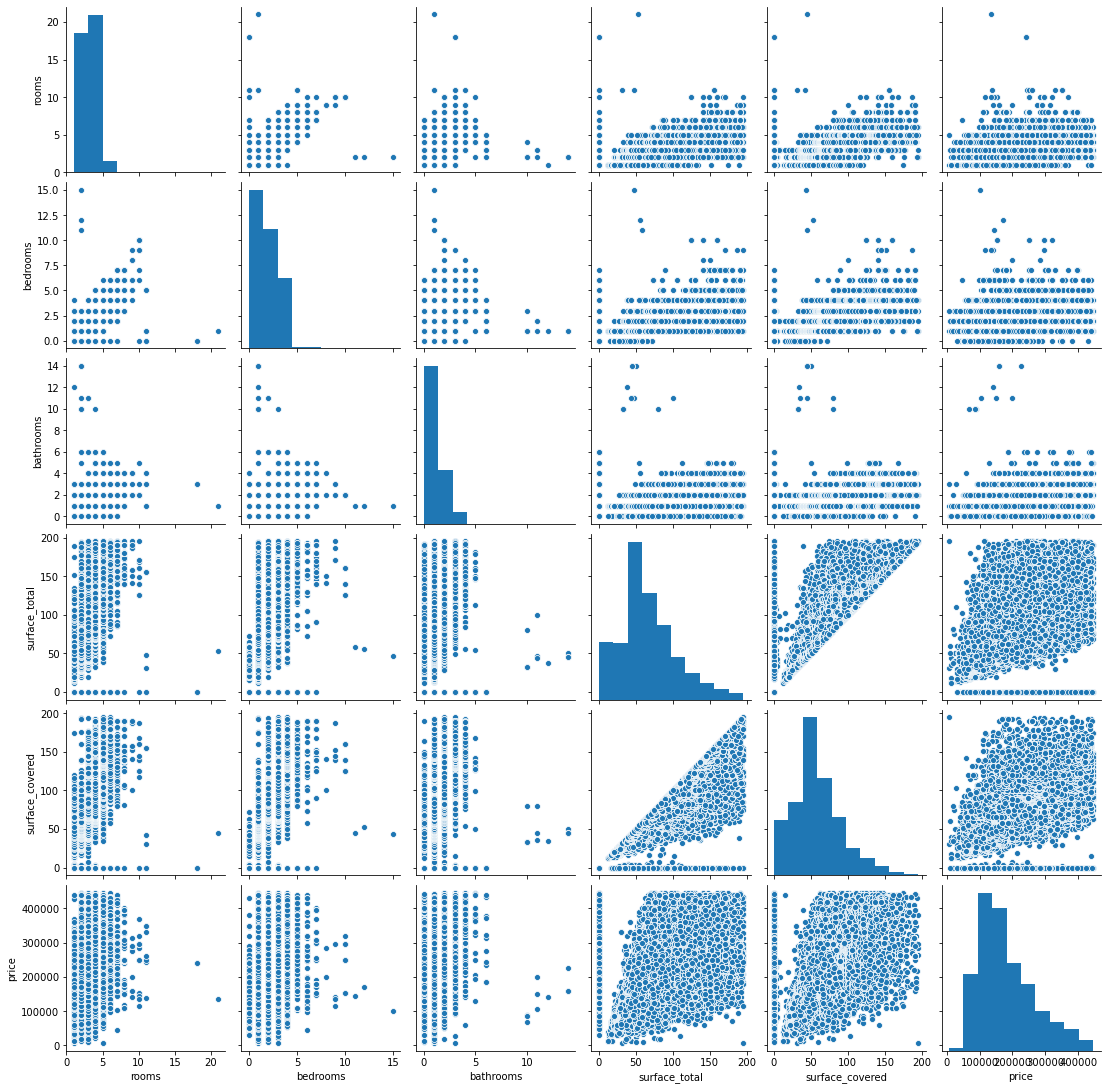

In [43]:
sns.pairplot(proper_final)
plt.savefig('salida.png')

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?

Habiendo filtrado outliers, procedo a analizar datos más precisos.

In [44]:
proper_final.describe().astype(int)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,78368,78368,78368,78368,78368,78368
mean,2,1,1,65,57,181038
std,1,0,0,39,34,85905
min,1,0,0,0,0,6000
25%,2,1,1,42,38,115000
50%,3,2,1,60,53,160000
75%,3,2,2,86,75,230000
max,21,15,14,195,195,446000


In [45]:
proper_final.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.931380,0.485050,0.631806,0.654515,0.595281
bedrooms,0.931380,1.000000,0.486201,0.624876,0.652155,0.577182
bathrooms,0.485050,0.486201,1.000000,0.440536,0.456937,0.576911
surface_total,0.631806,0.624876,0.440536,1.000000,0.934877,0.598486
surface_covered,0.654515,0.652155,0.456937,0.934877,1.000000,0.596646
price,0.595281,0.577182,0.576911,0.598486,0.596646,1.000000


##### Las mejores variables para predecir el precio son: 

1 - Supercifie total - surface_total (0.598486)

2 - Superficie cubierta - surface_covered (0.596646); 

3 - Ambientes - rooms (0.595281) 

4 - Dormitorios -  (0.5777182)

7. **Correlaciones:** ¿Qué diferencias encuentras según cada tipo de propiedad?

##### Me interesa comparar que variables son mejores para predecir el precio de una propiedad, dependiendo si se trata de una casa, un departamento o un PH en Capital Federal.

##### Procedo a filtrar por Departamentos en Capital Federal

In [46]:
departamentos=proper_final[(proper_final.property_type =='Departamento')]

##### Correlaciones de Variables para Departamentos en Capital Federal

In [47]:
departamentos.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.930876,0.494056,0.619162,0.642129,0.607377
bedrooms,0.930876,1.000000,0.498380,0.614618,0.638889,0.586574
bathrooms,0.494056,0.498380,1.000000,0.459824,0.465292,0.585195
surface_total,0.619162,0.614618,0.459824,1.000000,0.947773,0.627560
surface_covered,0.642129,0.638889,0.465292,0.947773,1.000000,0.611362
price,0.607377,0.586574,0.585195,0.627560,0.611362,1.000000


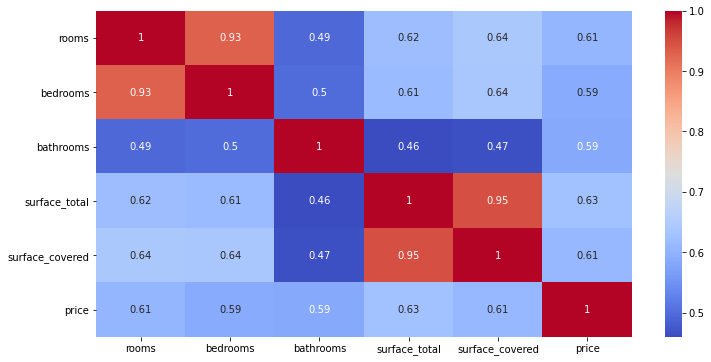

In [48]:
plt.figure(figsize=(12,6))
sns.heatmap(departamentos.corr(),cmap='coolwarm',annot=True)

##### Efectúo los mismos procedimientos para Casas en Capital Federal

In [49]:
casas=proper_final[(proper_final.property_type =='Casa')]

In [50]:
casas.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.640853,0.320785,0.045009,0.077865,0.322539
bedrooms,0.640853,1.000000,0.262856,0.040418,0.076706,0.334866
bathrooms,0.320785,0.262856,1.000000,0.062539,0.084148,0.362609
surface_total,0.045009,0.040418,0.062539,1.000000,0.930482,0.017197
surface_covered,0.077865,0.076706,0.084148,0.930482,1.000000,0.043637
price,0.322539,0.334866,0.362609,0.017197,0.043637,1.000000


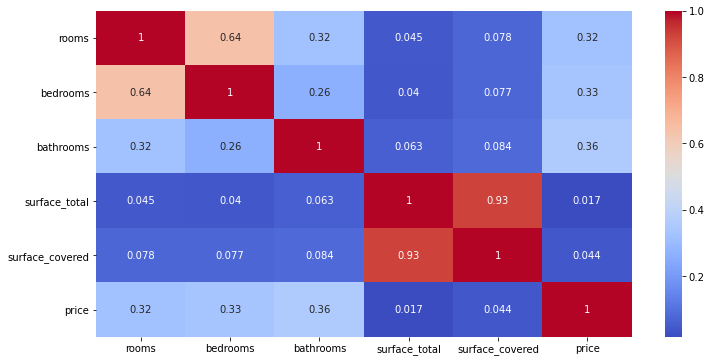

In [51]:
plt.figure(figsize=(12,6))
sns.heatmap(casas.corr(),cmap='coolwarm',annot=True)

##### Efectúo los mismos procedimientos para PH's en Capital Federal

In [52]:
phs=proper_final[(proper_final.property_type =='PH')]

In [53]:
phs.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.943576,0.447719,0.657610,0.726395,0.555278
bedrooms,0.943576,1.000000,0.438830,0.636257,0.726622,0.550288
bathrooms,0.447719,0.438830,1.000000,0.447598,0.515940,0.516950
surface_total,0.657610,0.636257,0.447598,1.000000,0.815456,0.641983
surface_covered,0.726395,0.726622,0.515940,0.815456,1.000000,0.691519
price,0.555278,0.550288,0.516950,0.641983,0.691519,1.000000


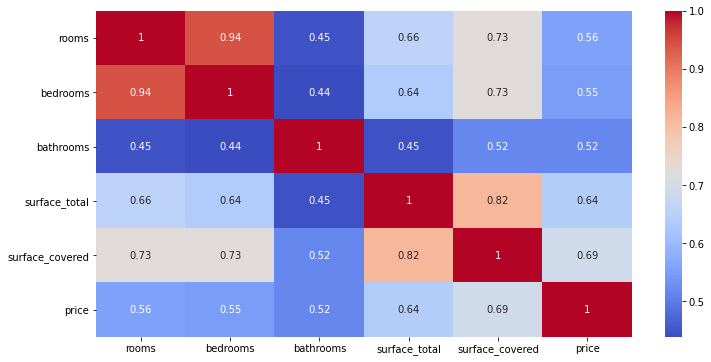

In [54]:
plt.figure(figsize=(12,6))
sns.heatmap(phs.corr(),cmap='coolwarm',annot=True)

#### Análisis de Correlaciones y Selección de Variables

Analizando los resultados obtenidos sobre correlación de variables para predecir precios, según sea la propiedad una casa, un departamento o un PH; surgen evidentes diferencias.

Para predecir el precio de un Departamento la mejor variable es superfice total.

Para predecir el precio de una Casa la mejor variable es "sanitarios", pero no la tomaría cómo variable para predecir ya que el 75% de las casas tienen dos baños, pero hay gran dispersión en tanto a la superficie total, superficie cubierta y los precios por zonas y barrios.En este contexto, la segunda mejor variable para predecir es ambientes.

Para predecir el precio de un PH la mejor variable es superficie cubierta.

Esto es válido considerando toda Capital Federal, sin segmentar por cada barrio. 

Sería valioso efectuar el mismo análisis segmentando por tipo de propiedad y por Barrios. 
Desarrollo en el punto siguiente

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


#### Adhiriendo a la existencia de un sesgo en la información que se pueda generar, en virtud a las limitaciones del data set, considero que para encontrar variables que permitan predecir el precio de una propiedad, se deben obtener datos estadísticos al nivel de Tipo de Propiedad(casa, departamento; propiedad horizontal(PH) y según su ubicación específica en cada uno de los Barrios de Capital Federal. Mi criterio se fundamenta en que naturalmente varía el precio de una propiedad (cualquiera sea su tipo o sus características) según sea su ubicación y que no todas las propiedades y valores asociados se publican en el medio analizado.


Me propongo avanzar de lo general a lo particular, constando el análisis de tres partes:
    
Primero: responder (según los datos contenidos en el data set) ¿Cúal es el tipo de propiedad más cara?, ¿cuales los Barrios más caros de Capital Federal?.
    
Segundo: obtener datos estadísticos medios, según el Tipo de Propiedad vinculado a Capital Federal como un conjunto.

Tercero: obtención de datos estadísticos medios, aplicando un criterio de Tipo de Propiedad según cada uno de los barrios de Capital Federal.

#### Primero: obtengo el listado de Barrios; desde el más caro al más barato. Considero valores medios.

In [55]:
proper_final.groupby('l3').mean().sort_values('price', ascending=False).head(1).astype(int)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
l3,,,,,,
Puerto Madero,1,1,1,64,59,325016


Grafico

Text(0.5, 1.0, 'Barrios más Caros - Capital Federal')

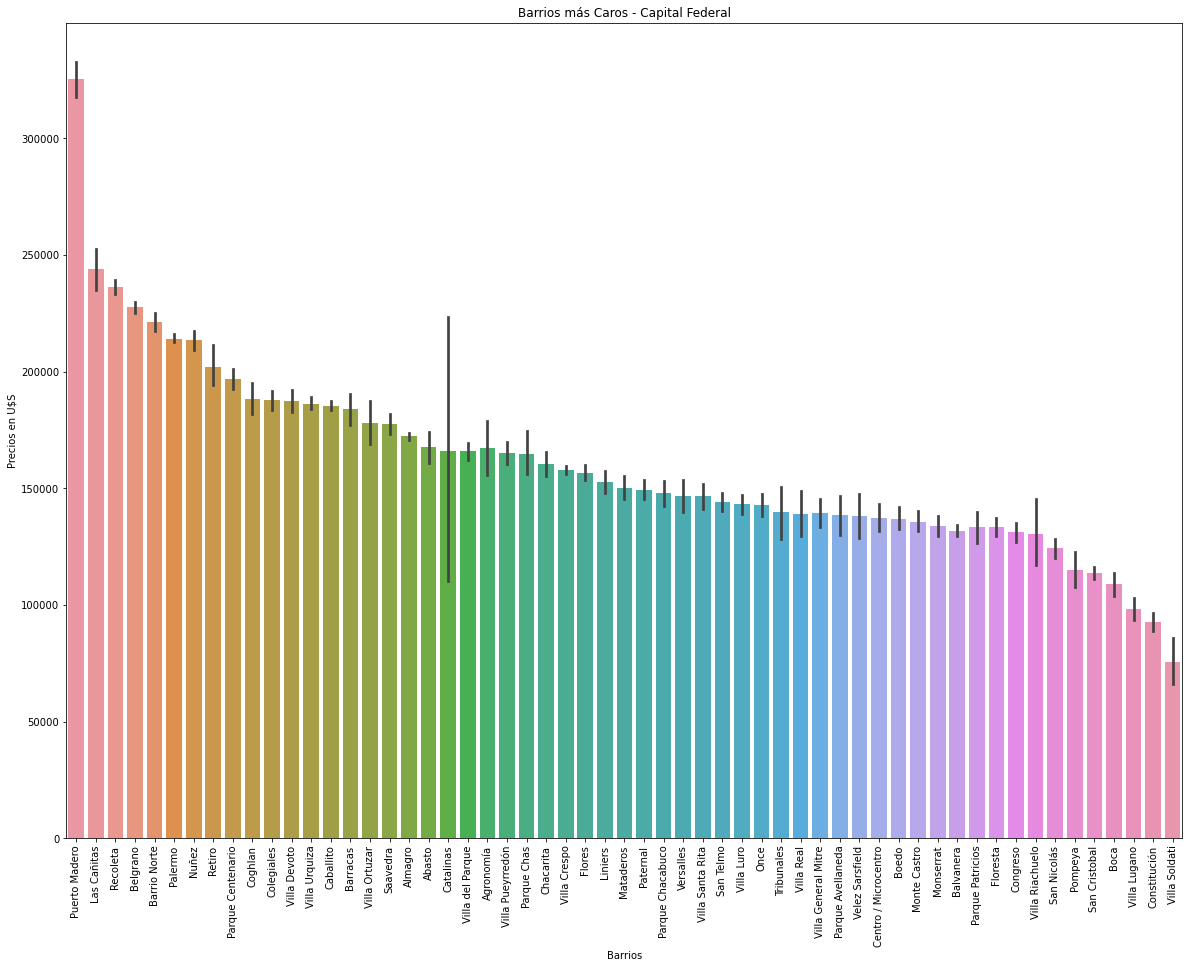

In [56]:
plt.figure(figsize=(20,15)) 
plt.xticks(rotation = 90)
Barrio=proper_final.groupby('l3').mean().sort_values('price', ascending=False).index
sns.barplot(x='l3', y='price', order=Barrio,data=outliers_filt);
plt.xlabel('Barrios')
plt.ylabel('Precios en U$S')
plt.title('Barrios más Caros - Capital Federal')

#### Obtengo el listado de tipo de propiedad de la mayor a la menos costosa. Considero valores medios. 

In [57]:
proper_final.groupby('property_type').mean().sort_values('price', ascending=False).astype(int)


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
property_type,,,,,,
Casa,4,2,1,97,76,252781
PH,3,2,1,98,81,190810
Departamento,2,1,1,60,54,178820


Grafico

Text(0.5, 1.0, 'Tipo de Propiedades más caras - Capital Federal')

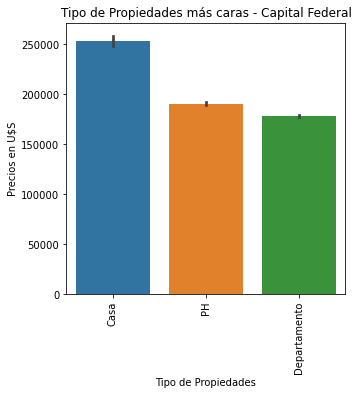

In [58]:
plt.figure(figsize=(5,5)) 
plt.xticks(rotation = 90)
Propiedades= proper_final.groupby('property_type').mean().sort_values('price', ascending=False).index
sns.barplot(x='property_type', y='price', order=Propiedades,data=outliers_filt);
plt.xlabel('Tipo de Propiedades')
plt.ylabel('Precios en U$S')
plt.title('Tipo de Propiedades más caras - Capital Federal')

El tipo de propiedad más caro, considerando la mediana es Casa, seguido por PH y finalmente Departamento. 

#### Segundo: procedo a analizar valores medios según Tipo de Propiedades en Capital Federal.

##### Departamentos en Capital Federal.

In [59]:
dep=departamentos.groupby('l3').mean().sort_values('price', ascending=False)

In [60]:
dep.describe().astype(int)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,57,57,57,57,57,57
mean,2,1,1,56,50,152899
std,0,0,0,10,10,44764
min,1,1,0,29,25,62751
25%,2,1,1,51,44,127648
50%,2,1,1,58,51,143748
75%,2,1,1,62,56,176793
max,3,2,1,85,82,325016


In [61]:
dep.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.977634,0.292351,0.605183,0.620591,-0.070694
bedrooms,0.977634,1.000000,0.266138,0.558302,0.568874,-0.094546
bathrooms,0.292351,0.266138,1.000000,0.652779,0.613004,0.772600
surface_total,0.605183,0.558302,0.652779,1.000000,0.977356,0.471475
surface_covered,0.620591,0.568874,0.613004,0.977356,1.000000,0.445195
price,-0.070694,-0.094546,0.772600,0.471475,0.445195,1.000000


##### Casas en Capital Federal.

In [62]:
casa_barrio=casas.groupby('l3').mean().sort_values('price', ascending=False)

In [63]:
casa_barrio.describe().astype(int)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,50,50,50,50,50,50
mean,4,2,1,96,76,236305
std,0,0,0,39,32,62558
min,2,1,1,0,0,82000
25%,3,2,1,75,60,208625
50%,4,2,1,99,74,243601
75%,4,3,1,126,100,279187
max,8,5,3,167,151,342366


In [64]:
casa_barrio.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.715790,0.475383,-0.025431,-0.070413,0.187644
bedrooms,0.715790,1.000000,0.477936,0.325379,0.262190,0.306989
bathrooms,0.475383,0.477936,1.000000,0.054832,0.001759,0.137902
surface_total,-0.025431,0.325379,0.054832,1.000000,0.973955,0.123057
surface_covered,-0.070413,0.262190,0.001759,0.973955,1.000000,0.074747
price,0.187644,0.306989,0.137902,0.123057,0.074747,1.000000


##### Propiedad Horizontal (PH'S) en Capital Federal.

In [65]:
ph_barrio=phs.groupby('l3').mean().sort_values('price', ascending=False)

In [66]:
ph_barrio.describe().astype(int)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,55,55,55,55,55,55
mean,3,2,1,97,77,172503
std,0,0,0,17,16,40642
min,2,1,1,51,37,79000
25%,3,2,1,88,69,140340
50%,3,2,1,97,75,171528
75%,3,2,1,105,82,196219
max,6,5,1,168,166,263597


In [67]:
ph_barrio.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.979252,0.403917,0.699986,0.886794,0.364759
bedrooms,0.979252,1.000000,0.407452,0.734607,0.898548,0.338535
bathrooms,0.403917,0.407452,1.000000,0.366433,0.474808,0.540677
surface_total,0.699986,0.734607,0.366433,1.000000,0.811531,0.316439
surface_covered,0.886794,0.898548,0.474808,0.811531,1.000000,0.476788
price,0.364759,0.338535,0.540677,0.316439,0.476788,1.000000


#### Tercero: finalmente presento datos abiertos de los valores medios para cada Tipo de Propiedad y por cada uno de los Barrios de Capital Federal. Este apartado provee datos de mayor utilidad para formar criterio de tasación; ya que considera el Tipo de Propiedad según el Barrio dondé esté situada la misma. Aún así no se debe minimizar el sesgo vinculado a la cantidad de propiedades publicadas que contiene el dataset. 

##### Datos abiertos de los valores medios para "Departamentos", según cada Barrio de Capital Federal.

In [68]:
dep.reset_index().head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,Puerto Madero,1.989637,1.158031,1.489637,64.735751,59.650259,325016.409326
1,Las Cañitas,2.542299,1.613883,1.635575,66.221258,56.199566,245203.002169
2,Recoleta,2.775875,1.808141,1.443534,73.081658,67.166294,237438.873914
3,Belgrano,2.695818,1.754926,1.492762,65.446924,57.333936,226914.801970
4,Barrio Norte,2.893328,1.914813,1.453826,73.990954,67.416887,222468.196381


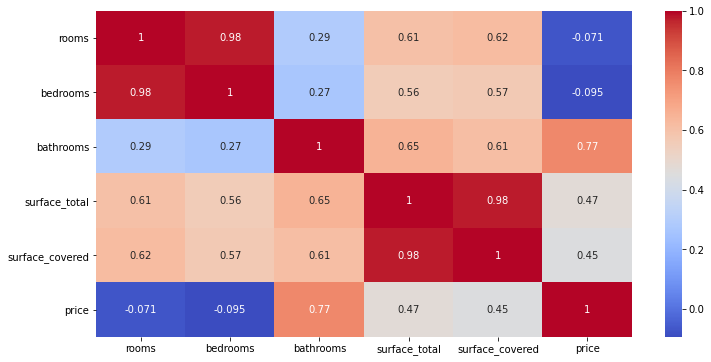

In [69]:
plt.figure(figsize=(12,6))
sns.heatmap(dep.corr(),cmap='coolwarm',annot=True)

##### Datos abiertos de los valores medios de "Casas" por cada uno de los Barrios de Capital Federal. 

In [70]:
casa_barrio.reset_index().head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,Colegiales,4.095238,3.142857,1.809524,59.619048,39.380952,342366.666667
1,San Telmo,4.500000,3.500000,2.000000,93.000000,52.500000,322500.000000
2,Parque Chas,4.411765,3.176471,1.529412,162.705882,145.882353,317600.000000
3,Villa Urquiza,4.000000,2.869565,1.630435,99.956522,72.065217,313823.913043
4,Nuñez,3.700000,2.650000,1.900000,127.850000,106.750000,312880.000000


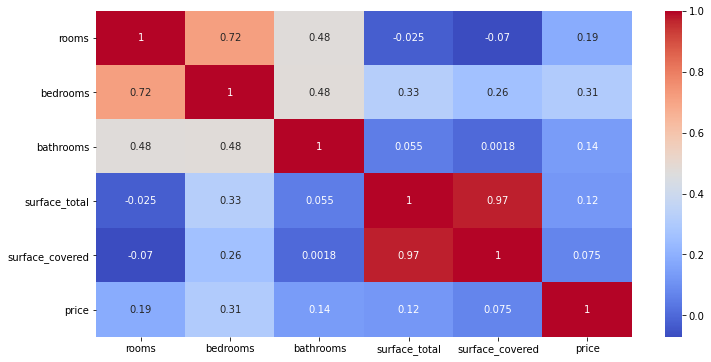

In [71]:
plt.figure(figsize=(12,6))
sns.heatmap(casa_barrio.corr(),cmap='coolwarm',annot=True)

##### Datos abiertos de los valores medios para Propiedad Horizontal (PH) por cada uno de los Barrios de Capital Federal. 

In [72]:
ph_barrio.reset_index().head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,Belgrano,3.424460,2.143885,1.661871,113.755396,91.640288,263597.841727
1,Once,6.844828,5.741379,1.517241,168.189655,166.275862,255317.241379
2,Palermo,3.331797,2.294931,1.501152,93.500000,86.437788,253588.006912
3,Nuñez,3.321101,2.229358,1.504587,104.889908,79.036697,247722.018349
4,Colegiales,3.109244,2.033613,1.403361,99.714286,75.789916,236599.159664


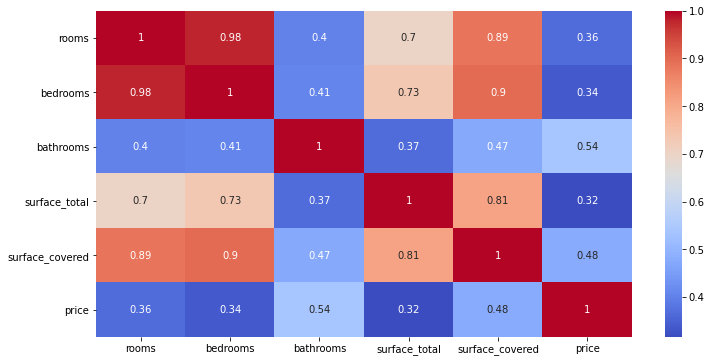

In [73]:
plt.figure(figsize=(12,6))
sns.heatmap(ph_barrio.corr(),cmap='coolwarm',annot=True)

#### Recapitulando, desde este punto puedo profundizar en el análisis y proveer estadísticos que sopesen el sesgo dado por las limitaciones intrínsecas del data set. Ofrecer datos de cada Tipo de Propiedad, según el Barrio dónde se encuentre localizada la misma, es ofrecer un mejor input para predecir precios de propiedades.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

##### Filtro el data frame según la consigna 

In [74]:
properati_final= df_capital_federal.loc[(df_capital_federal.surface_total<=1000)&
                                        (df_capital_federal.surface_total>=15)&
                                        (df_capital_federal.price<=4000000),
                                        ['rooms', 'bedrooms', 'bathrooms', 
                                         'surface_total', 'surface_covered','price']]

##### Descarto instancias con valores faltantes

In [75]:
properati_final.isnull().sum()

rooms                0
bedrooms             0
bathrooms          880
surface_total        0
surface_covered    517
price                0
dtype: int64

In [76]:
properati_final.dropna(subset=['bathrooms','surface_covered'], inplace = True)

##### Checkpoint, obtengo un dataset con 81019 instacias y 6 columnas.

In [77]:
properati_final.shape

(81019, 6)

In [78]:
properati_final.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


##### Creo Dataset´s de Entrenamiento y de Test, conteniendo las Columnas elegidas para efectuar una predicción. 

In [79]:
x = properati_final.loc[:, ['rooms','bedrooms','bathrooms','surface_total','surface_covered']]

In [80]:
y =properati_final.loc[:, ['price']]

##### Importo train_test_split. Selecciono un 30% de datos para test y el 70% restante para entrenamiento

In [81]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [82]:
print('Training data:', x_train.shape, y_train.shape)

Training data: (56713, 5) (56713, 1)


In [83]:
print('Test data:', x_test.shape, y_test.shape)

Test data: (24306, 5) (24306, 1)


##### Empleo Regresión con los Modelos de Árbol de Decisión, Vecinos Cercanos(KNN) y Regresión Lineal como Benchmark. 

##### Importo métricas que emplearé para evaluar los modelos seleccionados.

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Justificación de la selección de Métricas.

La selección del error cuadrático medio (MSE), la raíz del error cuadrático medio (RMSE) y el Coeficiente de Determinación (R2) cómo métricas del desempeño de los modelos, se fundamenta en los siguientes criterios:

Elijo el error cuadrático medio (MSE) ya que calcula el error al cuadrado, en lugar del error simple, para que el error siempre sea positivo. En caso contrario (no elevar el error al cuadrado) unas veces el error sería positivo y otras negativo.

Elijo la raíz del error cuadrático medio (RMSE) ya que representa la raíz cuadrada del segundo momento de la muestra de las diferencias entre los valores previstos y los valores observados.
Además es una medida de precisión, para comparar errores de predicción de diferentes modelos para un conjunto de datos en particular. 

Empleo el Coeficiente de Determinación (R2), ya que indica la aptitud del modelo en función del porcentaje de la variancia de la variable dependiente que es predecible a partir de la variable independiente. Además porqué permite una interpretación de los resultados "visualmente clara", gracias a que su escala es intuitiva, va de 0 a 1.


##### Modelos, métricas y gráficos. 

###### DecisionTreeRegressor

Importo "DecisionTreeRegressor", construyo y entreno el modelo con una profundidad máxima de 20 y agrego un random_state para que se mantengan los valores si alguien lo vuelve a ejecutar. 

Finalmente realizo una predicción.

In [85]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(max_depth=20, random_state=42)
tree_model.fit(x_train, y_train)
y_train_pred_tree = tree_model.predict(x_train)
y_test_pred_tree = tree_model.predict(x_test)

##### Selecciono Errores e imprimo resultados para verificar el desempeño del modelo. Primero para Train, luego para Test.

In [86]:
print('MSE train: ',mean_squared_error(y_train, tree_model.predict(x_train)))
print('RMSE train:',np.sqrt(mean_squared_error(y_train, tree_model.predict(x_train))))
print ('R2 of Linear Regresson train:', tree_model.score(x_train,y_train) )

MSE train:  3125513731.0531673
RMSE train: 55906.294198892916
R2 of Linear Regresson train: 0.964686591209566


In [87]:
print('MSE test: ',mean_squared_error(y_test, tree_model.predict(x_test)))
print('RMSE test:',np.sqrt(mean_squared_error(y_test, tree_model.predict(x_test))))
print ('R2 of Linear Regresson test:', tree_model.score(x_test,y_test) )

MSE test:  22636767759.250965
RMSE test: 150455.20183513418
R2 of Linear Regresson test: 0.7522822324922105


##### Realizo una predicción colocando valores de superficie cubierta, baños y ambientes.

In [88]:
tree_model.predict([[2,1,1,40,35]]).astype(int)

array([118047])

##### Cuadro de comparación entre Valor Real versus Valor Predicho 

In [89]:
val_real = pd.Series(np.squeeze(y_test, axis=0)['price'])
val_pred = pd.Series(y_test_pred_tree)

predicciones = pd.concat([val_real.rename('Valor real'),
                          round(val_pred.rename('Valor Pred'),0),
                          round(abs(val_real-val_pred).rename('Dif(+/-)'),0)], 
                          axis=1)

predicciones = predicciones.dropna()

predicciones.head()

,Valor real,Valor Pred,Dif(+/-)
5,150000.0,89950.0,60050.0
7,159500.0,246970.0,87470.0
20,75000.0,330429.0,255429.0
30,120000.0,149081.0,29081.0
41,142000.0,97143.0,44857.0


##### Grafíco RMSE Training versus RMSE Test. 

In [90]:
rmses_train = []
rmses_test = []

for max_depth in range(1, 30, 5):
    clf = DecisionTreeRegressor(max_depth=max_depth)
    model = clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    rmses_train.append(np.sqrt(mean_squared_error(y_train, clf.predict(x_train))))
    rmses_test.append(np.sqrt(mean_squared_error(y_test, y_pred)))

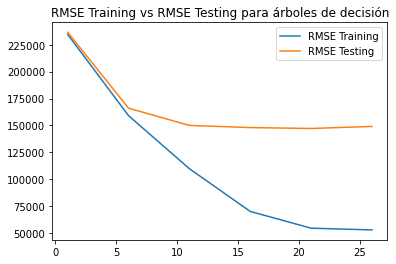

In [91]:
plt.plot(range(1,30, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 5), rmses_test, label='RMSE Testing')
plt.legend(loc='best')
plt.title('RMSE Training vs RMSE Testing para árboles de decisión')
plt.show()

##### Agrego una curva de Validación  

In [92]:
rmses_train = []
rmses_test = []
n_profundidad=range(1, 30, 1)
for max_depth in n_profundidad:
    clf = DecisionTreeRegressor(max_depth=max_depth)
    model = clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    rmses_train.append(np.sqrt(mean_squared_error(y_train, clf.predict(x_train))))
    rmses_test.append(np.sqrt(mean_squared_error(y_test, y_pred)))

Text(0.5, 1.0, 'Curva de Validacion')

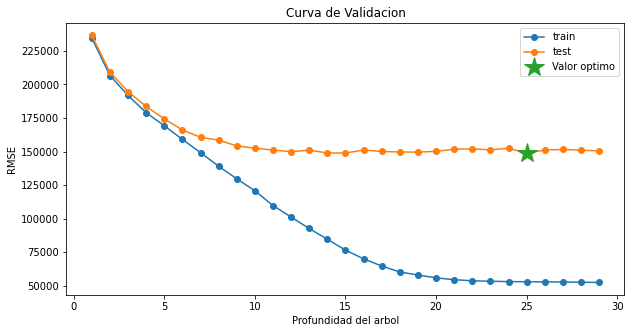

In [93]:
minimo = min(rmses_test)
i = rmses_test.index(minimo)

plt.figure(figsize = (10,5))
plt.plot(n_profundidad, rmses_train,'o-',label='train' )
plt.plot(n_profundidad, rmses_test,'o-',label='test')
plt.plot(i+1, minimo, "*", markersize = 20, label = "Valor optimo")
plt.legend()
plt.xlabel('Profundidad del arbol')
plt.ylabel('RMSE')
plt.title('Curva de Validacion')

##### El número adecuado de profundidad del modelo es 17. 

##### Vecinos Cercanos. KNeighborsRegressor (KNN)

In [94]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=20)
knn_model.fit(x_train, y_train)
y_train_pred_knn = knn_model.predict(x_train)
y_test_pred_knn = knn_model.predict(x_test)

##### Regresíon y Errores para el Entrenamiento del Modelo

In [95]:
print('MSE train: ',mean_squared_error(y_train, knn_model.predict(x_train)))
print('RMSE train:',np.sqrt(mean_squared_error(y_train, knn_model.predict(x_train))))
print('R2 of Linear Regresson train: ', knn_model.score(x_train,y_train))

MSE train:  24733913361.139275
RMSE train: 157270.19222071065
R2 of Linear Regresson train:  0.720545526698174


In [96]:
print('MSE test: ',mean_squared_error(y_test, knn_model.predict(x_test)))
print('RMSE test:',np.sqrt(mean_squared_error(y_test, knn_model.predict(x_test))))
print ('R2 of Linear Regresson test:', knn_model.score(x_test,y_test) )

MSE test:  28382618940.146004
RMSE test: 168471.41876337957
R2 of Linear Regresson test: 0.6894044646897982


##### Realizo una predicción colocando valores de superficie cubierta, baños y ambientes.

In [97]:
knn_model.predict([[2,1,1,40,35]]).astype(int)

array([[119311]])

##### Cuadro de comparación entre Valor Real versus Valor Predicho 

In [98]:
val_real = pd.Series(np.squeeze(y_test, axis=0)['price'])
val_pred = pd.Series(np.squeeze(y_test_pred_knn, axis=1))

predicciones = pd.concat([val_real.rename('Valor real'),
                          round(val_pred.rename('Valor Pred'),0),
                          round(abs(val_real-val_pred).rename('Dif(+/-)'),0)], 
                          axis=1)

predicciones = predicciones.dropna()

predicciones.head()

,Valor real,Valor Pred,Dif(+/-)
5,150000.0,87845.0,62155.0
7,159500.0,349030.0,189530.0
20,75000.0,297430.0,222430.0
30,120000.0,141410.0,21410.0
41,142000.0,92950.0,49050.0


##### Grafíco el desempeño de RMSE Training versus RMSE Test. 

In [99]:
rmses_train = []
rmses_test = []

for n_neighbors in range(1, 30, 1):
    knn = KNeighborsRegressor(n_neighbors = n_neighbors)
    model = knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    rmses_train.append(np.sqrt(mean_squared_error(y_train, knn.predict(x_train))))
    rmses_test.append(np.sqrt(mean_squared_error(y_test, y_pred)))

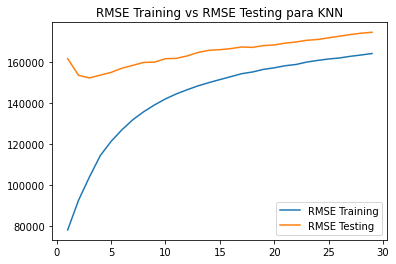

In [100]:
plt.plot(range(1,30, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test, label='RMSE Testing')
plt.legend(loc='best')
plt.title('RMSE Training vs RMSE Testing para KNN')
plt.show()

##### Agrego una curva de Validación 

In [101]:
rmses_train = []
rmses_test = []
n_profundidad=range(1, 30, 1)
for n_neighbors in n_profundidad:
    knn = KNeighborsRegressor(n_neighbors = n_neighbors, weights='distance',p=1)
    model = knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    rmses_train.append(np.sqrt(mean_squared_error(y_train, knn.predict(x_train))))
    rmses_test.append(np.sqrt(mean_squared_error(y_test, y_pred)))  

Text(0.5, 1.0, 'Curva de Validacion')

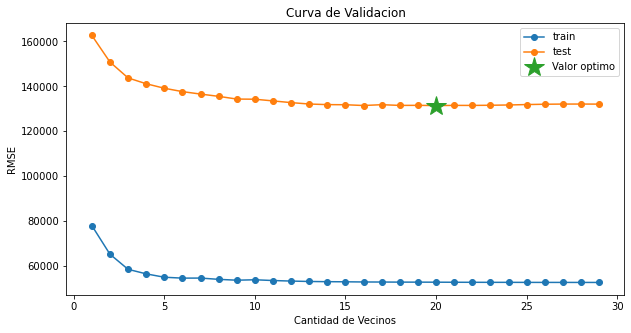

In [102]:
minimo = min(rmses_test)
i = rmses_test.index(minimo)

plt.figure(figsize = (10,5))
plt.plot(n_profundidad, rmses_train,'o-',label='train' )
plt.plot(n_profundidad, rmses_test,'o-',label='test')
plt.plot(i+1, minimo, "*", markersize = 20, label = 'Valor optimo')
plt.legend()
plt.xlabel('Cantidad de Vecinos')
plt.ylabel('RMSE')
plt.title('Curva de Validacion')

##### El número adecuado de vecinos cercanos es 20. 

###### Benchmark: LinearRegression

In [103]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_train_pred_linear = linear_model.predict(x_train)
y_test_pred_linear = linear_model.predict(x_test)

##### Selecciono Errores e imprimo resultados para verificar el desempeño del modelo. Primero para Train, luego para Test.

In [104]:
print('MSE train: ',mean_squared_error(y_train, linear_model.predict(x_train)))
print('RMSE train:',np.sqrt(mean_squared_error(y_train, linear_model.predict(x_train))))
print ('R2 of Linear Regresson train:', linear_model.score(x_train,y_train) )

MSE train:  39670215566.793655
RMSE train: 199173.83253528475
R2 of Linear Regresson train: 0.5517887107017188


In [105]:
print('MSE test: ',mean_squared_error(y_test, linear_model.predict(x_test)))
print('RMSE test:',np.sqrt(mean_squared_error(y_test, linear_model.predict(x_test))))
print ('R2 of Linear Regresson test:', linear_model.score(x_test,y_test) )

MSE test:  40985745552.32678
RMSE test: 202449.36540361587
R2 of Linear Regresson test: 0.5514864358797196


##### Realizo una predicción colocando valores de superficie cubierta, baños y ambientes.

In [106]:
linear_model.predict([[2,1,1,40,35]])

array([[122324.05221784]])

##### Cuadro de comparación entre Valor Real versus Valor Predicho 

In [107]:
val_real = pd.Series(np.squeeze(y_test, axis=0)['price'])
val_pred = pd.Series(np.squeeze(y_test_pred_linear, axis=1))

predicciones = pd.concat([val_real.rename('Valor real'),
                          round(val_pred.rename('Valor Pred'),0),
                          round(abs(val_real-val_pred).rename('Dif(+/-)'),0)], 
                          axis=1)

predicciones = predicciones.dropna()

predicciones.head()

,Valor real,Valor Pred,Dif(+/-)
5,150000.0,115905.0,34095.0
7,159500.0,193562.0,34062.0
20,75000.0,414336.0,339336.0
30,120000.0,146098.0,26098.0
41,142000.0,138544.0,3456.0


##### Grafíco el desempeño de los modelos seleccionados, considerando "R2" y "Raíz del error cuadrático medio -RMSE", tanto para Train cómo para Test.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361587
r2_train: 0.5517887107017188
r2_test: 0.5514864358797196


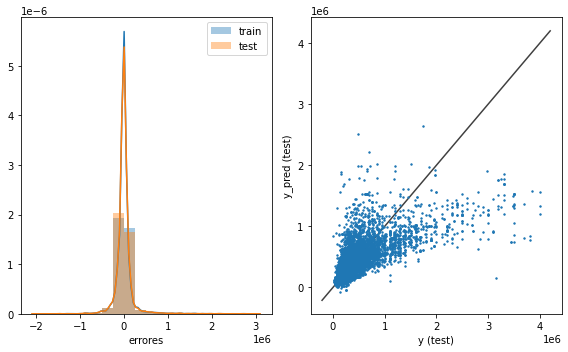

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 55906.294198892916
Raíz del error cuadrático medio en Test: 150455.20183513418
r2_train: 0.964686591209566
r2_test: 0.7522822324922105


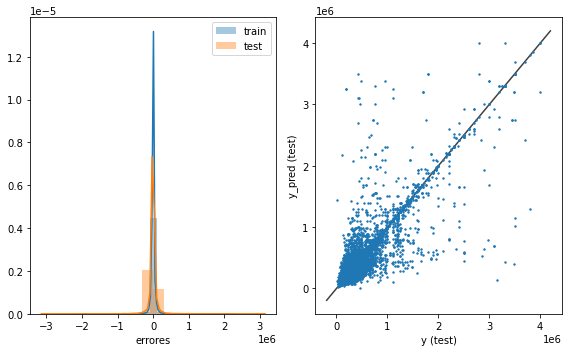

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 157270.19222071065
Raíz del error cuadrático medio en Test: 168471.41876337957
r2_train: 0.720545526698174
r2_test: 0.6894044646897982


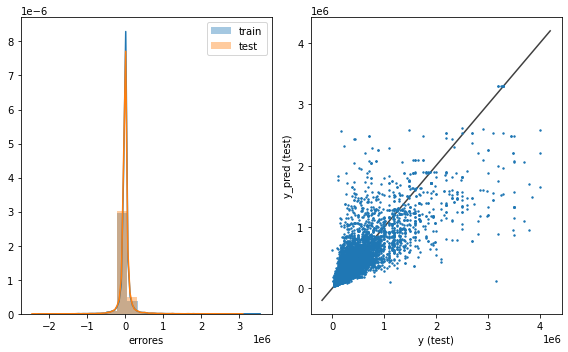

In [108]:
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model,tree_model, knn_model]):
    y_train_pred = model.predict(x_train).reshape(-1,1)
    y_test_pred = model.predict(x_test).reshape(-1,1)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print(f'r2_train: {r2_train}')
    print(f'r2_test: {r2_test}')
        
    plt.figure(figsize = (8,5))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

        
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

##### Considerando los resultados obtenidos, elijo el modelo de Árbol de Decisión como el de mayor potencial de predicción del valor de propiedades (r2_train: 0.964686591209566 - r2_test: 0.7522822324922105). 

##### Información que podría ayudar al modelo

Sería de utilidad contar con mayor información de índole cualitativa de las propiedades, la cual permita efectuar una segmentación más profunda. 

Esto porqué no es lo mismo tasar un departamento que se encuentra en el "Palacio de los Patos", que uno que forme parte de un edificio situado exactamente en la vereda de enfrente(más allá que cuenten con los mismos ambientes, calidad constructiva y servicios). 

Por ello, sería valioso conocer esas características, agruparlas; sumarlas como features y clases en el data set.

En consonancia y jugando el rol de tasador(y como pretendo que mi modelo sea un excelente tasador), consideraría valiosa la siguiente información:

Estilo del inmueble,
Características constructivas;
Amenities, (espacios comunes,seguridad adicional; servicios internos);
Potencial comercial;
Información histórica del lugar.

Otra información faltante, que pudiera llegar a explicar sesgos e incluso outliers es la relativa a la modalidad de pago. Una alternativa de venta financiada o bien de precios de inversión "en pozo", puede explicar la existencia de valores que en principio se pueden considerar atípicos; ya sea por montos mayores(financiación) o menores(inversión en pozo).

Aspectos cómo cantidad y calidad de servicios públicos disponibles y geografía urbana pueden hacer gran diferencia. Una propiedad en una zona inundable de Belgrano, puede valer la mitad de otra exactamente igual y a solo metros de distancia. 

Lo detallado anteriormente, no es taxativo; simplemente consideré valioso mencionar aspectos que hacen a la información disponible y a la capacidad predictiva del modelo elegido.

Igualmente he notado que el modelo elegido (árbol de decisión)el cuál ha alcanzado un elevado R2 tanto en train como en test; es muy impreciso en cuanto a las diferencias en precio real y precio predicho para las propiedades en general. Estimo que lo mismo se puede deber a todo lo detallado en información faltante en el data set y al desconocimiento de metodologías (aún no aprendidas a esta altura de la carrera), que mejoren el desempeño de los modelos.